# Analyzing the crime over neighborhood (Districts) of Boston

In [1]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from bokeh.plotting import *
from bokeh.models import HoverTool

In [2]:
df=pd.read_csv("../data/ProcessedData/merged_crime_data_2012_to_2017.csv") # reading csv file from processed data

/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#creating coordinate logitude and latitude from Location table
df['LONGITUDE'] = df.LOCATION.apply(lambda x: float(x.split('[')[1].split(']')[0].split(',')[0]))
df['LATITUDE']  = df.LOCATION.apply(lambda x: float(x.split('[')[1].split(']')[0].split(',')[1]))

/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


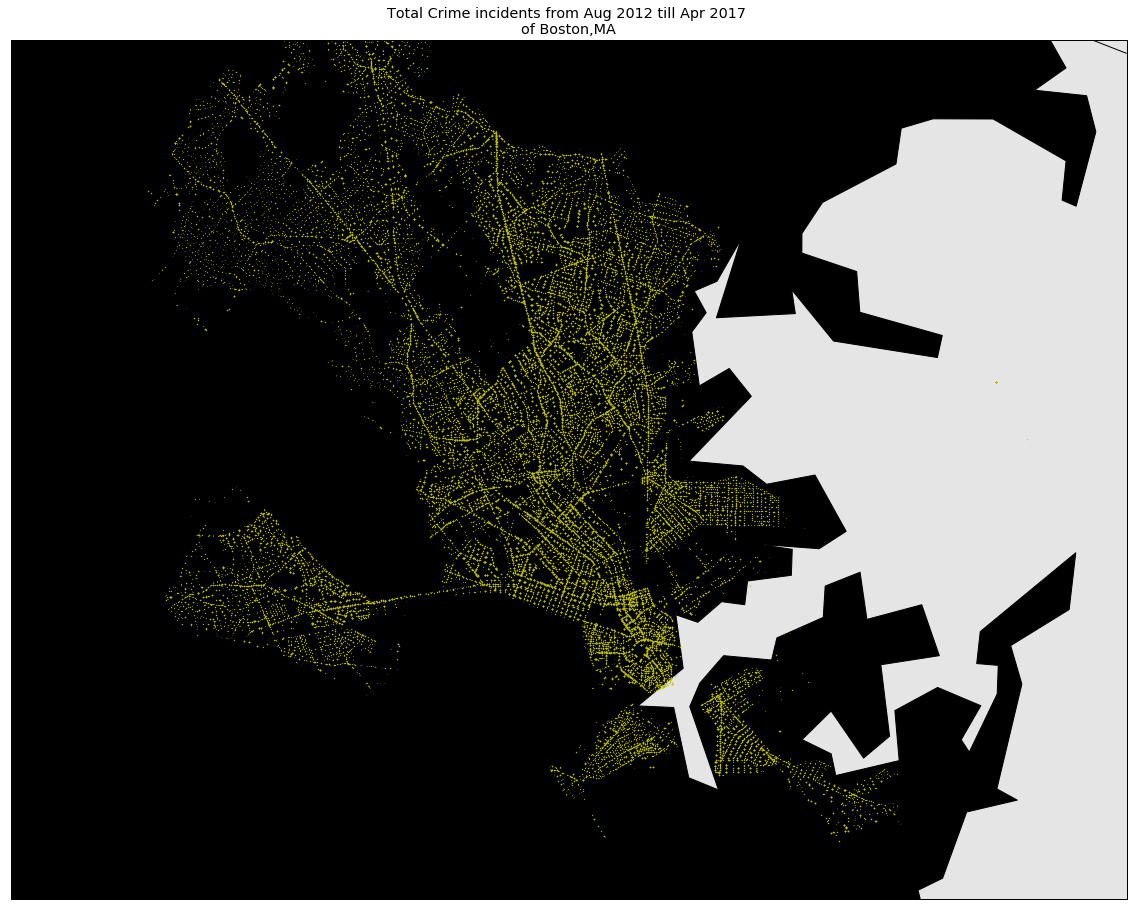

In [4]:
#mapping crime location on boston map as per longitude and latitude

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,18))
boston_map = Basemap(projection='merc', lat_0=42.3601, lon_0=-71.0589,
    resolution = 'h', area_thresh = 1,
    llcrnrlon=-71.212006, llcrnrlat=42.405571,
    urcrnrlon=-70.940094, urcrnrlat=42.250742)
 
boston_map.drawcoastlines()
boston_map.drawcountries()
boston_map.fillcontinents(color='black')
boston_map.drawmapboundary()
 
boston_map.drawmeridians(np.arange(0, 360, 30))
boston_map.drawparallels(np.arange(-90, 90, 30))

x,y = boston_map(df.LONGITUDE.tolist(), df.LATITUDE.tolist())
boston_map.plot(x, y, 'yo', markersize=.1)

t = "Total Crime incidents from Aug 2012 till Apr 2017 \n"
t += "of Boston,MA"
plt.title(t)

plt.show()

In [5]:
# finding crime incidents by Boston districts
df1= df.groupby('DISTRICT').INCIDENT_NUM.count()
df1 = df1.reset_index(inplace=False)
df1 = df1.sort_values(by='INCIDENT_NUM',ascending=False)
df1.head()

,DISTRICT,INCIDENT_NUM
3,B2,67248
8,D4,59864
5,C11,57388
0,A1,48619
4,B3,43043


In [6]:
df1.to_csv('../analysis/analysis2/CrimeIncidents_byBostonDistricts.csv', index=False) #export to csv

/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


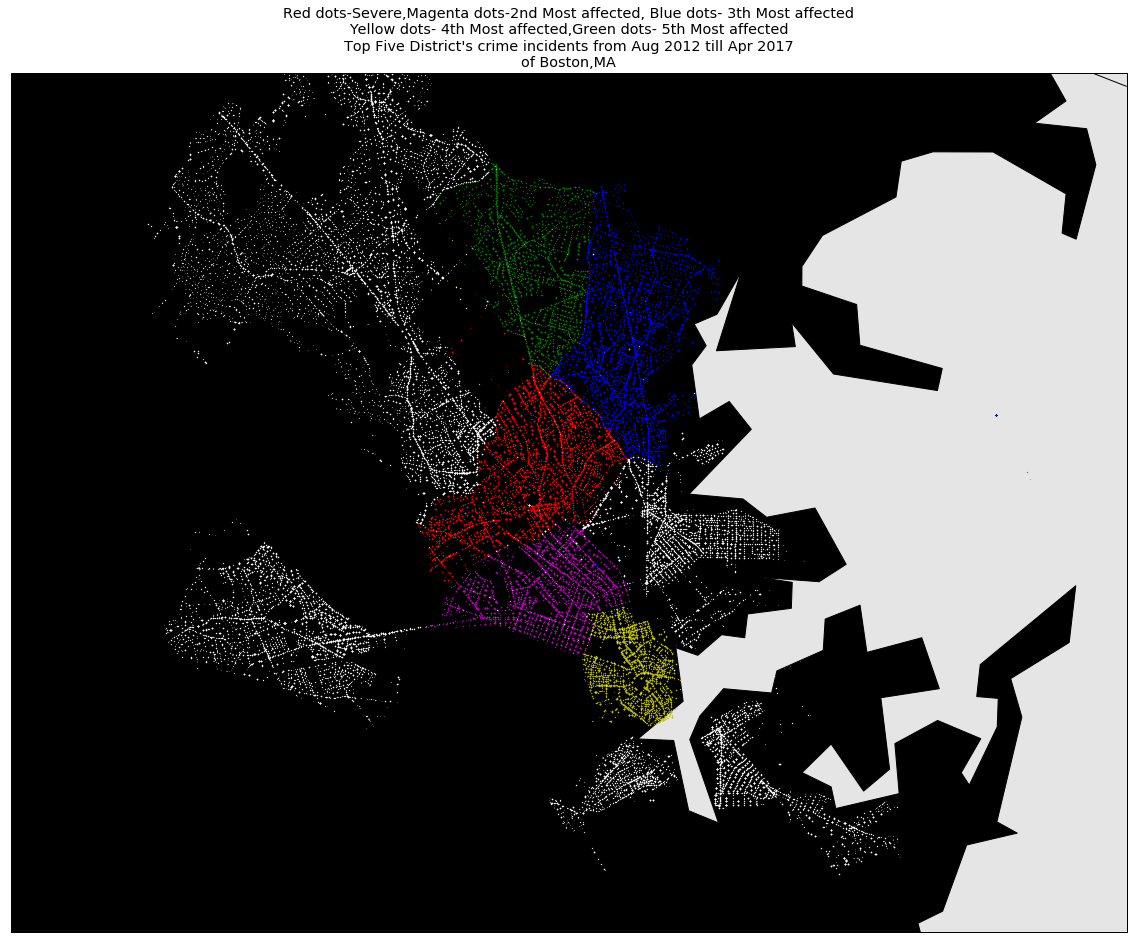

In [7]:
#mapping crime location on boston map as per longitude and latitude. Color plot to find top five crime affect District
df.head()
df[df.DISTRICT=='B2'].LONGITUDE.tolist()

plt.figure(figsize=(20,18))
boston_map = Basemap(projection='merc', lat_0=42.3601, lon_0=-71.0589,
    resolution = 'h', area_thresh = 1,
    llcrnrlon=-71.212006, llcrnrlat=42.405571,
    urcrnrlon=-70.940094, urcrnrlat=42.250742)
 
boston_map.drawcoastlines()
boston_map.drawcountries()
boston_map.fillcontinents(color='black')
boston_map.drawmapboundary()
 
boston_map.drawmeridians(np.arange(0, 360, 30))
boston_map.drawparallels(np.arange(-90, 90, 30))

xd1,yd1 = boston_map(df[df.DISTRICT=='B2'].LONGITUDE.tolist(), df[df.DISTRICT=='B2'].LATITUDE.tolist())
boston_map.plot(xd1, yd1, 'ro', markersize=.1)

xd2,yd2 = boston_map(df[df.DISTRICT=='D4'].LONGITUDE.tolist(), df[df.DISTRICT=='D4'].LATITUDE.tolist())
boston_map.plot(xd2, yd2, 'mo', markersize=.1)

xd3,yd3 = boston_map(df[df.DISTRICT=='C11'].LONGITUDE.tolist(), df[df.DISTRICT=='C11'].LATITUDE.tolist())
boston_map.plot(xd3, yd3, 'bo', markersize=.1)

xd4,yd4 = boston_map(df[df.DISTRICT=='A1'].LONGITUDE.tolist(), df[df.DISTRICT=='A1'].LATITUDE.tolist())
boston_map.plot(xd4, yd4, 'yo', markersize=.1)

xd5,yd5 = boston_map(df[df.DISTRICT=='B3'].LONGITUDE.tolist(), df[df.DISTRICT=='B3'].LATITUDE.tolist())
boston_map.plot(xd5, yd5, 'go', markersize=.1)

xd6,yd6 = boston_map(df[df['DISTRICT'].isin(['B2','D4','C11','A1','B3'])==False].LONGITUDE.tolist()
                     , df[df['DISTRICT'].isin(['B2','D4','C11','A1','B3'])==False].LATITUDE.tolist())
boston_map.plot(xd6, yd6, 'wo', markersize=.1)

t ="Red dots-Severe,Magenta dots-2nd Most affected, Blue dots- 3th Most affected\n"
t +="Yellow dots- 4th Most affected,Green dots- 5th Most affected\n"
t +="Top Five District's crime incidents from Aug 2012 till Apr 2017\n"
t += "of Boston,MA"
plt.title(t)

plt.show()

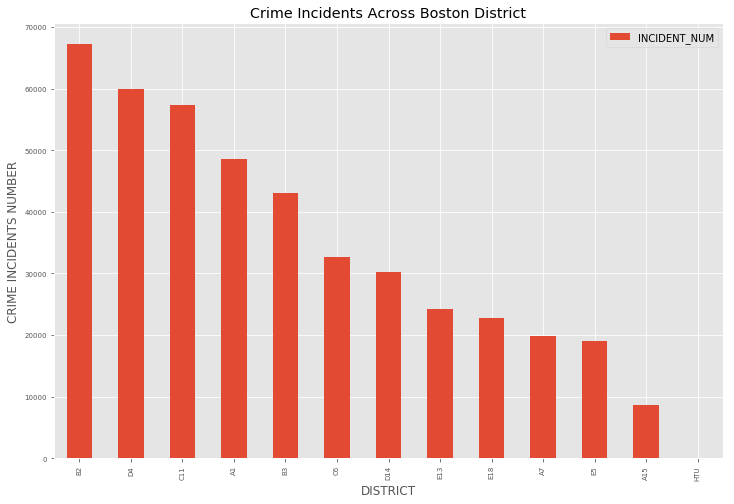

In [8]:
#plotting graph of crime number by district
plt.figure(figsize=(12,8))
pt1=df1["INCIDENT_NUM"].plot(kind='bar',x=df1.DISTRICT, title='Crime Incidents Across Boston District',fontsize=7)
pt1.set_ylabel('CRIME INCIDENTS NUMBER')
pt1.set_xlabel("DISTRICT")
pt1.set_xticklabels(df1.DISTRICT)
pt1.legend(fontsize=10)
plt.show()

# conclusion:
- Most crime affect area of Boston is B2 district (B2 District police Station is Roxbuery #source Boston gov)

# Analysis of crime pattern

In [9]:
df2=df[df.OFFENSE_DESCRIPTION.apply(lambda x: 'ASSAULT - AGGRAVATED' in x) |
        df.OFFENSE_DESCRIPTION.apply(lambda x: 'AGGRAVATED ASSAULT' in x)]

In [10]:
df3=df[df.OFFENSE_DESCRIPTION.apply(lambda x: 'HOMICIDE' in x) |
       df.OFFENSE_DESCRIPTION.apply(lambda x: 'MURDER' in x)]

/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


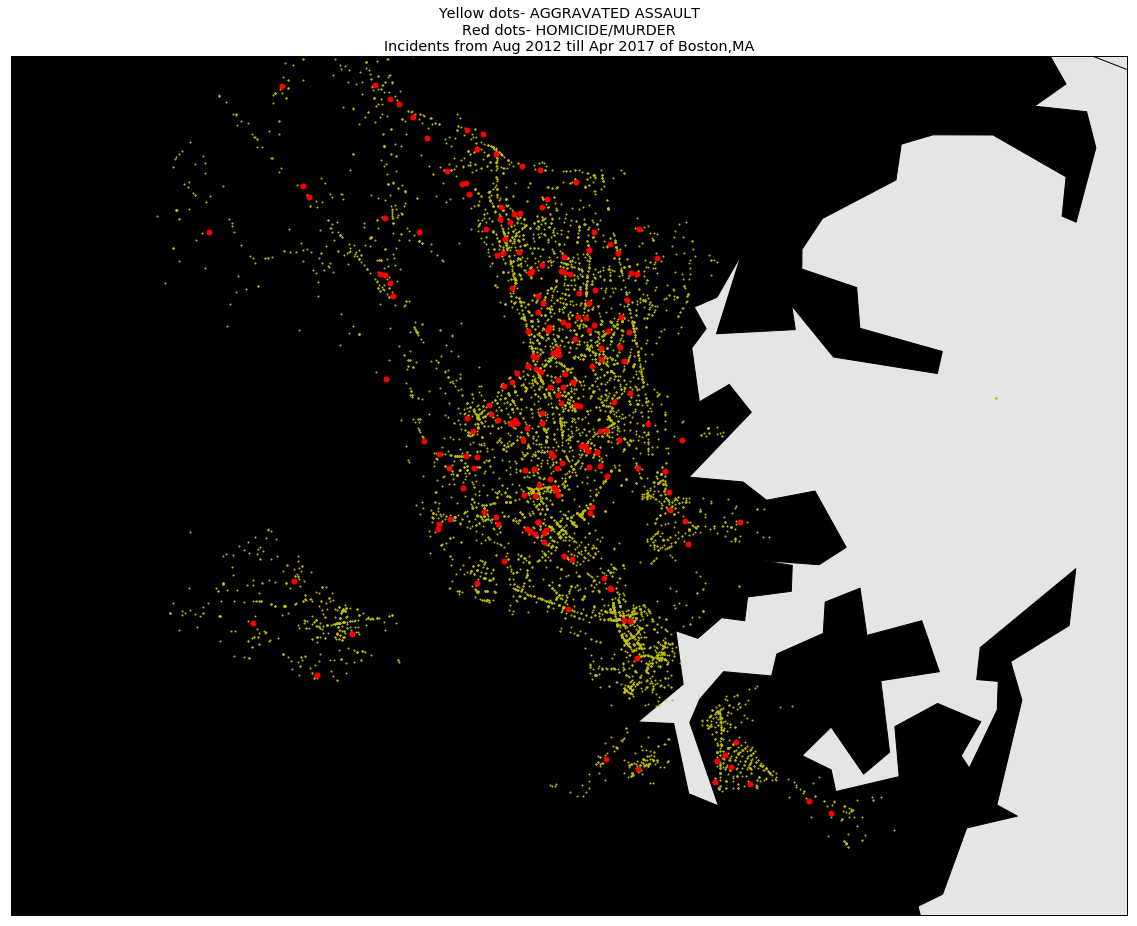

In [11]:
#mapping crime location on boston map as per longitude and latitude

plt.figure(figsize=(20,18))
boston_map1 = Basemap(projection='merc', lat_0=42.3601, lon_0=-71.0589,
    resolution = 'h', area_thresh = 1,
    llcrnrlon=-71.212006, llcrnrlat=42.405571,
    urcrnrlon=-70.940094, urcrnrlat=42.250742)
 
boston_map1.drawcoastlines()
boston_map1.drawcountries()
boston_map1.fillcontinents(color='black')
boston_map1.drawmapboundary()
 
boston_map1.drawmeridians(np.arange(0, 360, 30))
boston_map1.drawparallels(np.arange(-90, 90, 30))

x1,y1 = boston_map1(df2.LONGITUDE.tolist(), df2.LATITUDE.tolist())
boston_map1.plot(x1, y1, 'yo', markersize=1)

x2,y2 = boston_map1(df3.LONGITUDE.tolist(), df3.LATITUDE.tolist())
boston_map1.plot(x2, y2, 'ro', markersize=5)

t = "Yellow dots- AGGRAVATED ASSAULT\n" 
t += "Red dots- HOMICIDE/MURDER\n" 
t += "Incidents from Aug 2012 till Apr 2017 of Boston,MA"
plt.title(t)

plt.show()

In [12]:
#df2=df2[df2['OFFENSE_DESCRIPTION'].isin(['Missing Person Reported'])]
df_A=df2.groupby('MONTH').INCIDENT_NUM.count()
df_A=df_A.reset_index(inplace=False)
df_A.columns=['MONTH','ASSAULT_INCIDENT_NUM']
df_A['MONTH']=df_A.MONTH.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun', 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_A.head()

,MONTH,ASSAULT_INCIDENT_NUM
0,Jan,733
1,Feb,700
2,Mar,774
3,Apr,732
4,May,713


In [13]:
df_A.to_csv('../analysis/analysis2/AggravetedAssault_Incidents_byMonth.csv', index=False) #export to csv

In [14]:
df_H=df3.groupby('MONTH').INCIDENT_NUM.count()
df_H=df_H.reset_index(inplace=False)
df_H.columns=['MONTH','HOMICIDE-MURDER_INCIDENT_NUM']
df_H['MONTH']=df_H.MONTH.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun', 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_H.head()

,MONTH,HOMICIDE-MURDER_INCIDENT_NUM
0,Jan,22
1,Feb,9
2,Mar,14
3,Apr,11
4,May,14


In [15]:
df_H.to_csv('../analysis/analysis2/Homicide_Murder_Incidents_byMonth.csv', index=False) #export to csv

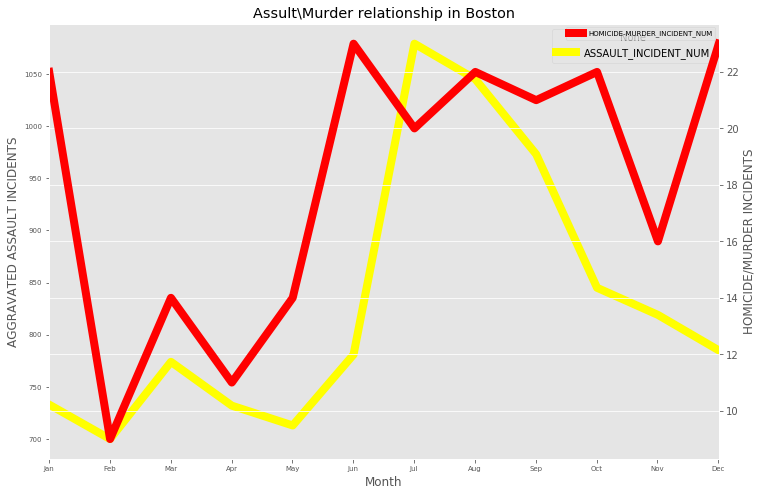

In [16]:
plt.figure(figsize=(12,8))
pt1=df_A["ASSAULT_INCIDENT_NUM"].plot(kind='line',title='Assult\Murder relationship in Boston',fontsize=7)
pt1.set_ylabel('AGGRAVATED ASSAULT INCIDENTS')
pt1.set_xlabel("Month")

#to set ticks and correspoding labels
start, end = pt1.get_xlim()
pt1.set_xticks(np.arange(start, end, .999))
pt1.set_xticklabels(df_A.MONTH)
pt1.lines[-1].set_linewidth(8)
pt1.lines[-1].set_color('yellow')
pt1.legend(fontsize=7)

pt2=df_H["HOMICIDE-MURDER_INCIDENT_NUM"].plot(secondary_y=True,kind='line', title='Assult\Murder relationship in Boston',fontsize=7)
pt2.set_ylabel('HOMICIDE/MURDER INCIDENTS')
#pt2.set_xlabel("Month")
#pt2.set_xticklabels(df_A.MONTH)
pt2.lines[-1].set_linewidth(8)
pt2.lines[-1].set_color('red')
pt2.legend(fontsize=7)

plt.show()

# Conclusion: We have plot Aggravated Assult vs Homicide/Murder and from above plot we can deduce:
- Some of Aggravated assualt may be intended to Homicide/Murder (Note- an accuse can have multiple charges such as
   assaualt, murder, theft etc for same the incidence.)
- Most of crime happened on summer compared to winter season.